<a href="https://colab.research.google.com/github/Ray88888888/CS-ECON-206/blob/main/Code_Assignment_1_The_computational_pipline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Replicate from Rodolfo Mendes's [Article](https://reinforcement-learning4.fun/2019/06/16/gym-tutorial-frozen-lake/) (Mendes, 2019).

Reference:
---
Mendes, R. (2019, June 16). Gym Tutorial: The Frozen Lake. Reinforcement Learning for Fun. https://reinforcement-learning4.fun/2019/06/16/gym-tutorial-frozen-lake/



# **Gym Tutorial: The Frozen Lake**

In this article, we are going to learn how to create and explore the Frozen Lake environment using the [Gym library](https://gym.openai.com/), an open source project created by [OpenAI](https://openai.com/) used for reinforcement learning experiments. The Gym library defines a uniform interface for environments what makes the integration between algorithms and environment easier for developers. Among many ready-to-use environments, the default installation includes a text-mode version of the Frozen Lake game, used as example in our last post.

## **The Frozen Lake Environment**

The first step to create the game is to import the Gym library and create the environment. The code below shows how to do it:

In [1]:
#frozen-lake-ex1.py
import gym # loading the Gym library
 
env = gym.make("FrozenLake-v0")
env.reset()                    
env.render()


SFFF
FHFH
FFFH
HFFG


The first instruction imports Gym objects to our current namespace. The next line calls the method gym.make() to create the Frozen Lake environment and then we call the method env.reset() to put it on its initial state. Finally, we call the method env.render() to print its state:

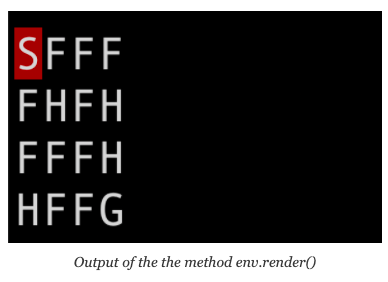

So, the same grid we saw in the [previous post](https://reinforcement-learning4.fun/2019/06/09/introduction-reinforcement-learning-frozen-lake-example/) now is represented by a matrix of characters. Their meaning is as follows:

*   S: initial state
*   **F**: frozen lake
*   **H**: hole
*   **G**: the goal
*   **Red square**: indicates the current position of the player







Also, we can inspect the possible actions to perform in the environment, as well as the possible states of the game:

In [2]:
# frozen-lake-ex1.py
 
print("Action space: ", env.action_space)
print("Observation space: ", env.observation_space)

Action space:  Discrete(4)
Observation space:  Discrete(16)


In the code above, we print on the console the field action_space and the field observation_space. The returned objects are of the type Discrete, which describes a discrete space of size n. For example, the action_space for the Frozen Lake environment is a discrete space of 4 values, which means that the possible values for this space are 0 (zero), 1, 2 and 3. Yet, the observation_space is a discrete space of 16 values, which goes from 0 to 15. Besides, these objects offer some utility methods, like the sample() method which returns a random value from the space. With this method, we can easily create a dummy agent that plays the game randomly:

In [3]:
# frozen-lake-ex2.py
import gym
 
MAX_ITERATIONS = 10
 
env = gym.make("FrozenLake-v0")
env.reset()
env.render()
for i in range(MAX_ITERATIONS):
    random_action = env.action_space.sample()
    new_state, reward, done, info = env.step(
       random_action)
    env.render()
    if done:
        break


SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG


The code above executes the game for a maximum of 10 iterations using the method sample() from the action_space object to select a random action. Then the env.step() method takes the action as input, executes the action on the environment and returns a tuple of four values:

*   **new_state**: the new state of the environment
*   **reward**: the reward
*   **done**: a boolean flag indicating if the returned state is a terminal state
*   reward: info: an object with additional information for debugging purposes

Finally, we use the method env.render() to print the grid on the console and use the returned “done” flag to break the loop. Notice that the selected action is printed together with the grid:

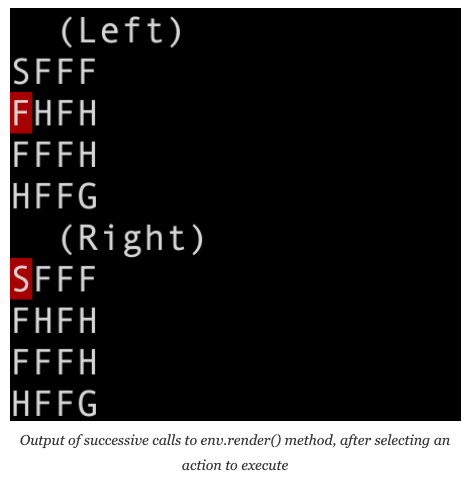

## **Stochastic vs Deterministic**

Note in the previous output the cases in which the player moves in a different direction than the one chosen by the agent. This behavior is completely normal in the Frozen Lake environment because it simulates a slippery surface. Also, this behavior represents an important characteristic of real-world environments: the transitions from one state to another, for a given action, are probabilistic. For example, if we shoot a bow and arrow there’s a chance to hit the target as well as to miss it. The distribution between these two possibilities will depend on our skill and other factors, like the direction of the wind, for example. Due to this probabilistic nature, the final result of a state transition does not depend entirely on the taken action.

By default, the Frozen Lake environment provided in Gym has probabilistic transitions between states. In other words, even when our agent chooses to move in one direction, the environment can execute a movement in another direction:

In [6]:
# frozen-lake-ex3.py
import gym
 
actions = {
    'Left': 0,
    'Down': 1,
    'Right': 2, 
    'Up': 3
}
 
print('---- winning sequence ------ ')
winning_sequence = (2 * ['Right']) + (3 * ['Down']) + ['Right']
print(winning_sequence)
 
env = gym.make("FrozenLake-v0")
env.reset()
env.render()
 
for a in winning_sequence:
    new_state, reward, done, info = env.step(actions[a])
    print()
    env.render()
    print("Reward: {:.2f}".format(reward))
    print(info)
    if done:
        break  
 
print()

---- winning sequence ------ 
['Right', 'Right', 'Down', 'Down', 'Down', 'Right']

SFFF
FHFH
FFFH
HFFG

  (Right)
SFFF
FHFH
FFFH
HFFG
Reward: 0.00
{'prob': 0.3333333333333333}

  (Right)
SFFF
FHFH
FFFH
HFFG
Reward: 0.00
{'prob': 0.3333333333333333}

  (Down)
SFFF
FHFH
FFFH
HFFG
Reward: 0.00
{'prob': 0.3333333333333333}

  (Down)
SFFF
FHFH
FFFH
HFFG
Reward: 0.00
{'prob': 0.3333333333333333}

  (Down)
SFFF
FHFH
FFFH
HFFG
Reward: 0.00
{'prob': 0.3333333333333333}



Executing the code above, we can observe different results and paths at each execution. Also, using the info object returned by the step method we can inspect the probability used by the environment to choose the executed movement:



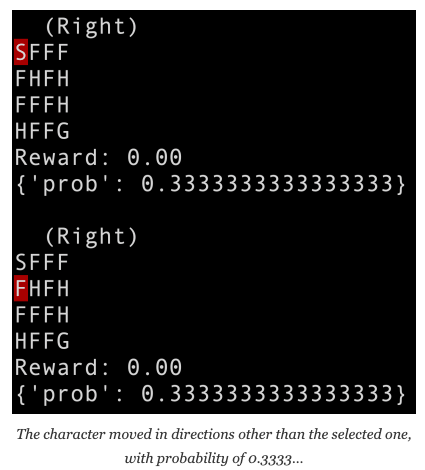

However, the Frozen Lake environment can also be used in deterministic mode. By setting the property is_slippery=False when creating the environment, the slippery surface is turned off and then the environment always executes the action chosen by the agent:

In [8]:
# frozen-lake-ex4.py
env = gym.make("FrozenLake-v0", is_slippery=False)

Observe that the probabilities returned in the info object is always equals to 1.0.

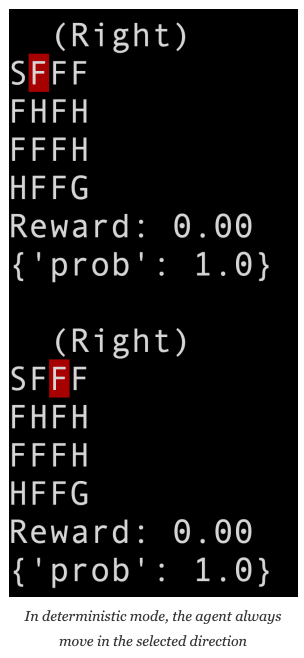

## **Map sizes and custom maps**

The default 4×4 map is not the only option to play the Frozen Lake game. Also, there’s an 8×8 version that we can create in two different ways. The first one is to use the specific environment id for the 8×8 map:

In [9]:
# frozen-lake-ex5.py
env = gym.make("FrozenLake8x8-v0")
env.reset()
env.render()


SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG


The second option is to call the make method passing the value “8×8” as an argument to the map_name parameter:

In [10]:
# frozen-lake-ex5.py
env = gym.make('FrozenLake-v0', map_name='8x8')
env.reset()
env.render()


SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG


And finally, we can create our custom map of the Frozen Lake game by passing an array of strings representing the map as an argument to the parameter desc:

In [12]:
custom_map = [
    'SFFHF',
    'HFHFF',
    'HFFFH',
    'HHHFH',
    'HFFFG'
]
 
env = gym.make('FrozenLake-v0', desc=custom_map)
env.reset()
env.render()


SFFHF
HFHFF
HFFFH
HHHFH
HFFFG


## **Conclusion**

In this post, we learned how to use the Gym library to create an environment to train a reinforcement learning agent. We focused on the Frozen Lake environment, a text mode game with simple rules but that allows us to explore the fundamental concepts of reinforcement learning.

## **References**

A brief introduction to reinforcement learning concepts can be found at [How AI Learns to Play Games](https://reinforcement-learning4.fun/2019/06/03/how-ai-learns-play-games/). The Frozen Lake game rules and fundamental concepts of reinforcement learning can be found at [Introduction to Reinforcement Learning: the Frozen Lake Example](https://reinforcement-learning4.fun/2019/06/09/introduction-reinforcement-learning-frozen-lake-example/). Finally, you find instructions on how to install the Gym environment, check the post [How to Install Gym](https://reinforcement-learning4.fun/2019/05/24/how-to-install-openai-gym/).

Finally, the code examples for this post can be found at https://github.com/rodmsmendes/reinforcementlearning4fun/tree/master/gym-tutorial-frozen-lake.

# **Provide a brief reflection on the following three questions**

**Research Question (RQ) 1: How to experiment with the Frozen-AI environment in openAI gym by the dichotomy of environment and agents?  (2 points)**

We experiment with the Frozen Lak environment using the Gym Library created by OpenAI. We divide the scenario (or game) into the dichotomy of environment and agents. The environment is set to be a frozen lake that has a starting point, safe tiles, holes, and a goal. The agent is defined to have four action choices, up, down, left, and right, and the sample methods determine the movement sequences. When a random action is made, it would be taken as an input and executed in the environment, and then we could retain results from this execution.


**Research Question (RQ) 2: What are the general principles and references for lucid communication by professional markdowns and code formatting? (2 points)**

*   Markdown:

Markdown is an easy-to-learn basic annotating language. Your in-code annotation will be partly based on markdown.

Guideline: https://www.markdownguide.org/ 

Crash Course: https://www.youtube.com/watch?v=HUBNt18RFbo 

*   Code Formatting

Structure and Format your code properly improves readability and maintainability.

How to structure your python project: https://docs.python-guide.org/writing/structure/

PIP-8 convention for code formatting: https://realpython.com/python-pep8/ 


**Research Question (RQ) 3: How to tell stories using the Frozen-AI environment in openAI gym with lucid communication by professional markdowns and code formatting in Jupyter Notebook?  (2 points)**

See above. I think the best communication is to combine text explanation with code demonstration. We first tell the background, procedures, and what we are doing in text in markdown blocks. Then, we insert the coding blocks to present how it is actually implemented and what the result will be like. To make it more understandable, we might need to use metaphors or refer to relevant examples to help explain it. Besides, it is also notable to follow the references and conventions listed in research question 2.